# ML Andrew Ng course 
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time

## Ex 2 Part 1 Logistic Regression

In [324]:
csv = pd.read_csv("ml coursera/ex2data1.csv", header=None)

In [325]:
csv.columns = ['m1','m2','y/n']

In [326]:
csv.head()

,m1,m2,y/n
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [327]:
csv.describe()

,m1,m2,y/n
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Here, feature scaling is not required as both features have same range

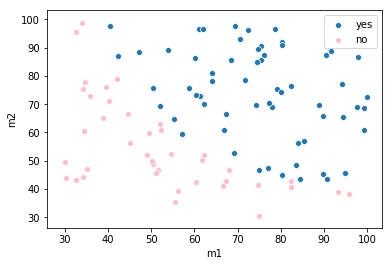

In [328]:
sns.scatterplot(x='m1',y='m2',data=csv[csv['y/n']==1])
sns.scatterplot(x='m1',y='m2',data=csv[csv['y/n']==0], color='pink')
plt.legend(['yes','no'])

A pretty clear classification. The graph shows that logistic function would work pretty weel here for classification

#### Matrices & Feature Scaling

In [329]:
csv['x0'] = np.ones((len(csv),1))
csv.head()

,m1,m2,y/n,x0
0,34.623660,78.024693,0,1.0
1,30.286711,43.894998,0,1.0
2,35.847409,72.902198,0,1.0
3,60.182599,86.308552,1,1.0
4,79.032736,75.344376,1,1.0


In [330]:
X = np.matrix(csv[['x0','m1','m2']])
y = np.matrix(csv['y/n']).reshape((len(csv),1))
m = len(csv)
n = len(csv.columns) -1
theta = np.matrix(np.zeros((n, 1)))

In [331]:
X.shape

(100, 3)

In [332]:
y.shape

(100, 1)

In [333]:
theta.shape

(3, 1)

In [334]:
def featureScaling(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_norm = (X - mean)/std
    X_norm[:,0] = np.ones((len(X),1))
    return X_norm, mean, std

In [335]:
X, mean, std = featureScaling(X)

c:\users\chhavi jain\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


### Learning algorithm

We know that the algorithm is the same, the cost function and hyposthesis has changed. So, I will be copying some of the code from the 'ML Coursera Ex1.ipynb' file.

In [336]:
def updateThetaMatrix(x, h, theta, alpha):
    dj = 1/m * x.T.dot((h-y))
    return theta - (alpha * dj)

def gradientDescent(x, n, theta, alpha):
    j = []
    thetaValues = []
    for i in range(n):
        h = predict(x, theta)
        j.append(calcCost(h))
        if np.isnan(j[-1]): print(h[:2][:],j[-1],theta)
        theta = updateThetaMatrix(x, h, theta, alpha)
        thetaValues.append(theta.A1.tolist())
    return j, thetaValues

In [337]:
def logistic(z):
    sig = 1/(1 + np.exp(-z))
    #sig[sig==1] = np.nextafter(1,0) 
    return sig

def predict(x, theta):
    return logistic(x.dot(theta))

def calcCost(h):
    error = (-y.T.dot(np.log(h)) - ((1-y).T.dot(np.log(1-h))))
    return sum(error).item(0)/m

Initial theta

In [280]:
updateThetaMatrix(X,predict(X,theta), theta, 0.1)

matrix([[0.01      ],
        [0.02812291],
        [0.02509861]])

#### Lets test the gradient descent now

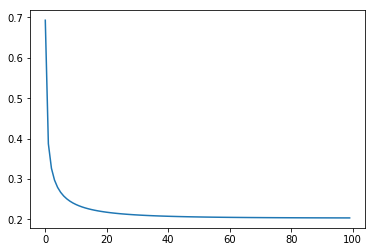

In [338]:
j, t = gradientDescent(X, 100, theta, 3)
sns.lineplot(x=range(len(j)),y=j)

##### Pretty fast convergence. Lets try plotting the decision boundary now.

In [339]:
print("cost",j[-1])
print("theta", t[-1])
theta = t[-1]

cost 0.20384130602300787
theta [1.6131019235169737, 3.7684337280532847, 3.5080755370924863]


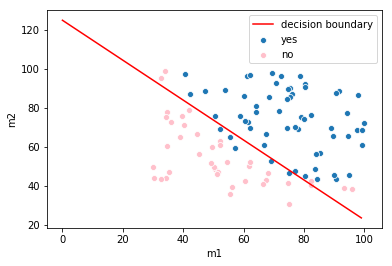

In [385]:
m1 = np.arange(100)
m1 = (m1 - mean.item(1))/std.item(1)   #normalizing m1 values
m2 = (-theta[0] - theta[1] * m1)/theta[2]     #gives normalized values
m2 = (m2*std.item(2)) + mean.item(2)      #'denormalizing'values
sns.lineplot(x=np.arange(100), y=m2, color='red')
sns.scatterplot(x='m1',y='m2',data=csv[csv['y/n']==1])
sns.scatterplot(x='m1',y='m2',data=csv[csv['y/n']==0], color='pink')
plt.legend(['decision boundary','yes','no'])

### Prediction

In [357]:
std

matrix([[ 0.        , 19.36068671, 18.48963567]])

In [364]:
def getHypothesis(marks):
    x = np.matrix(marks).reshape((1,n))
    x_norm = (x - mean)/std
    x_norm[:,0] = np.ones((len(x),1))
    p = predict(x_norm, theta)
    return p.item(0)

In [365]:
"The chances of admission are "+str(getHypothesis([1,45,85])*100)[:4]+"%"

c:\users\chhavi jain\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


'The chances of admission are 76.0%'

In [371]:
predictions = [round(getHypothesis(i)) for i in np.matrix(csv[['x0','m1','m2']])]

c:\users\chhavi jain\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [372]:
csv['predictions'] = predictions

In [373]:
'Accuracy='+str(1-len(csv[csv['predictions']!=csv['y/n']])/len(csv))

'Accuracy=0.89'

## Ex 2 Part 2 Regularized Logistic Regression

In [256]:
csv = pd.read_csv("ml coursera/ex2data2.csv", header=None)

In [257]:
csv.columns = ['t1','t2','y/n']

In [258]:
csv.head()

,t1,t2,y/n
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [259]:
csv.describe()

,t1,t2,y/n
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


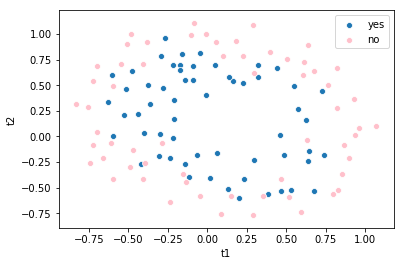

In [260]:
sns.scatterplot(x='t1',y='t2',data=csv[csv['y/n']==1])
sns.scatterplot(x='t1',y='t2',data=csv[csv['y/n']==0], color='pink')
plt.legend(['yes','no'])

A linear regression model will definitely not work here. According to the instructions pdf, I will create features upto degree 6

In [261]:
for i in np.arange(7):
    for j in np.arange(7-i):
        csv['x'+str(j)+'y'+str(i)] = (csv['t1']**j) * (csv['t2']**i)

In [262]:
csv.head()

,t1,t2,y/n,x0y0,x1y0,x2y0,x3y0,x4y0,x5y0,x6y0,...,x0y3,x1y3,x2y3,x3y3,x0y4,x1y4,x2y4,x0y5,x1y5,x0y6
0,0.051267,0.69956,1,1.0,0.051267,0.002628,0.000135,0.000007,3.541519e-07,1.815630e-08,...,0.342354,0.017551,0.000900,0.000046,0.239497,0.012278,0.000629,0.167542,0.008589,0.117206
1,-0.092742,0.68494,1,1.0,-0.092742,0.008601,-0.000798,0.000074,-6.860919e-06,6.362953e-07,...,0.321335,-0.029801,0.002764,-0.000256,0.220095,-0.020412,0.001893,0.150752,-0.013981,0.103256
2,-0.213710,0.69225,1,1.0,-0.213710,0.045672,-0.009761,0.002086,-4.457837e-04,9.526844e-05,...,0.331733,-0.070895,0.015151,-0.003238,0.229642,-0.049077,0.010488,0.158970,-0.033973,0.110047
3,-0.375000,0.50219,1,1.0,-0.375000,0.140625,-0.052734,0.019775,-7.415771e-03,2.780914e-03,...,0.126650,-0.047494,0.017810,-0.006679,0.063602,-0.023851,0.008944,0.031940,-0.011978,0.016040
4,-0.513250,0.46564,1,1.0,-0.513250,0.263426,-0.135203,0.069393,-3.561597e-02,1.827990e-02,...,0.100960,-0.051818,0.026596,-0.013650,0.047011,-0.024128,0.012384,0.021890,-0.011235,0.010193


Now we have all features from degree 0 to 6. 't1' & 't2' is repeated so we will remove them.

#### Matrices & Feature Scaling

In [263]:
features = csv.drop(['t1','t2','y/n'], axis=1)

In [292]:
X = np.matrix(features)
y = np.matrix(csv['y/n']).reshape((len(csv),1))
m = len(csv)
n = len(features.columns)
theta = np.matrix(np.zeros((n, 1)))

In [265]:
X.shape

(118, 28)

In [266]:
y.shape

(118, 1)

In [267]:
theta.shape

(28, 1)

As we are working with a regularized model, feature scaling is not required. But, for experimental purpose, I will still do it. For feature scaling, I will use the previous function as that is generalized for any matrix

In [268]:
def featureScaling(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_norm = (X - mean)/std
    X_norm[:,0] = np.ones((len(X),1))
    return X_norm, mean, std

In [269]:
X_norm , mean, std = featureScaling(X)

c:\users\chhavi jain\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


#### Learning algorithm

The sigmoid function, predict function and gradient descent algorithm are same. What we need to change it the cost function and update theta function. Remember theta0 is not regularized

In [277]:
def updateThetaMatrix(x, h, theta, alpha, lamda):
    dj = 1/m * x.T.dot((h-y))
    dj += (lamda/m) * theta
    return theta - (alpha * dj)

def gradientDescent(x, n, theta, alpha, lamda): #as lambda is a keyword
    j = []
    thetaValues = []
    for i in range(n):
        h = predict(x, theta)
        j.append(calcCost(h, theta, lamda))
        if np.isnan(j[-1]): print(h[:2][:],j[-1],theta)
        theta = updateThetaMatrix(x, h, theta, alpha, lamda)
        thetaValues.append(theta.A1.tolist())
    return j, thetaValues

def logistic(z):
    sig = 1/(1 + np.exp(-z))
    #sig[sig==1] = np.nextafter(1,0) 
    return sig

def predict(x, theta):
    return logistic(x.dot(theta))

def calcCost(h, theta, lamda):
    error = (-y.T.dot(np.log(h)) - ((1-y).T.dot(np.log(1-h))))
    thetasqr = np.square(theta)
    thetasqr[0,0] = theta[0,0]   #theta0 is not to be regularized. Though regularizing it will make a small differnece
    error += (lamda/(2*m))*sum(thetasqr)
    return sum(error).item(0)/m

Initial cost and updated theta

In [278]:
ih = predict(X, theta)

In [279]:
calcCost(ih, theta, 0)

0.6931471805599454

#### Gradient Descent

with lambda 1

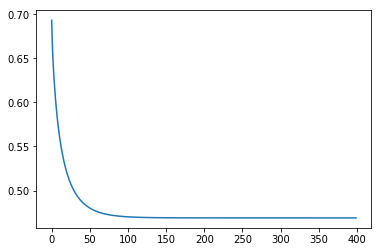

In [293]:
j, t = gradientDescent(X, 400, theta, 3, 1)
sns.lineplot(x=range(len(j)),y=j)

Pretty fast convergance

In [294]:
theta = t[-1]

In [295]:
def getFeatures(x1,x2,degree):
    out = []
    for i in range(degree+1):
        for j in range(degree+1-i):
            terms= (x1**j * x2**i)
            out.append(terms)
    out = np.matrix(out).reshape((n, len(x1)))
    return out

In [296]:
u_vals = np.linspace(-1,1.5,100)
v_vals= np.linspace(-1,1.5,100)
p = []
t1 = []
t2 = []
for i in u_vals:
    z = getFeatures(np.array([i for j in range(100)]), v_vals, 6)
    z = predict(z.T, theta).A1
    for j in range(len(z)):
        if z[j]>0.48 and z[j]<0.52: 
            p.append(round(z[j],1))
            t1.append(i)
            t2.append(v_vals[j])

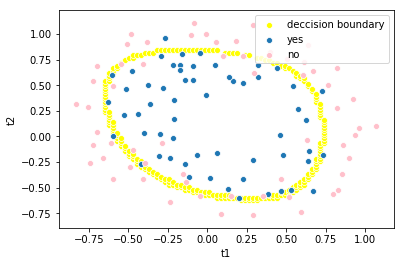

In [297]:
sns.scatterplot(t1, t2, color='yellow')
sns.scatterplot(x='t1',y='t2',data=csv[csv['y/n']==1])
sns.scatterplot(x='t1',y='t2',data=csv[csv['y/n']==0], color='pink')
plt.legend(['deccision boundary','yes','no'], loc=1)

The yellow points create the boundary where the two class regions separate

#### Lets try to increase lambda and see if it underfits the data

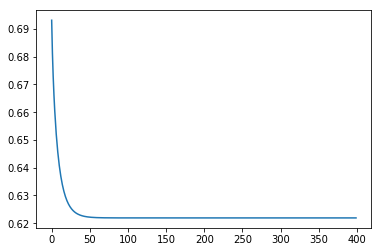

In [285]:
theta = np.matrix(np.zeros((n, 1)))
j, t = gradientDescent(X, 400, theta, 1, 10)
sns.lineplot(x=range(len(j)),y=j)

In [286]:
theta = t[-1]
p = []
t1 = []
t2 = []
for i in u_vals:
    z = getFeatures(np.array([i for j in range(100)]), v_vals, 6)
    z = predict(z.T, theta).A1
    for j in range(len(z)):
        if z[j]>0.49 and z[j]<0.51: 
            p.append(round(z[j],1))
            t1.append(i)
            t2.append(v_vals[j])

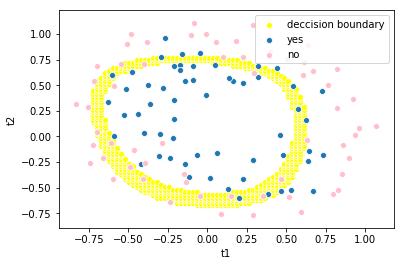

In [287]:
sns.scatterplot(t1, t2, color='yellow')
sns.scatterplot(x='t1',y='t2',data=csv[csv['y/n']==1])
sns.scatterplot(x='t1',y='t2',data=csv[csv['y/n']==0], color='pink')
plt.legend(['deccision boundary','yes','no'], loc=1)

For lambda = 10, the decision boundary definitely distorted. If we increase lambda more, the model will have more difficlty sepaarating the two regions

### Prediction

In [168]:
def predictPass(t1, t2):
    fea = getFeatures(np.array([t1]), np.array([t2]), 6)
    return predict(fea.T, theta).item(0)

In [170]:
'For 0 and 0.5, the chances of passing are '+str(predictPass(0, 0.5)*100)[:5]+'%'

'For 0 and 0.5, the chances of passing are 78.32%'

In [171]:
'For 0.25 and -0.5, the chances of passing are '+str(predictPass(0.25, -0.5)*100)[:5]+'%'

'For 0.25 and -0.5, the chances of passing are 57.94%'

In [298]:
predictions = predict(X, theta).A1.tolist()
predictions = [round(i) for i in predictions]

In [299]:
csv['predictions'] = predictions

In [300]:
'Accuracy = ' + str(100 * len(csv[csv['y/n']==csv['predictions']])/len(csv))[:5]+'%'

'Accuracy = 82.20%'